# Exercice pratique : pouvoir d'achat en Angleterre

## Sujet de TP 2
### Auteur : Nicolas
### Version 1  - Avril 2020

In [1]:
# Importation des librairies
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Pour accéder aux données, je vais prévoir 2 versions
- Soit une version locale chargée sur Gitlab
- soit un accès direct via l'URL données dans l'exemple

In [2]:
url_ext="https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"
url_git="https://app-learninglab.inria.fr/moocrr/gitlab/26c634550904aba62520384fc8aa7dec/mooc-rr/blob/master/module3/exo3/Donnees-TP-2-cereales.csv"

Récupération des données
La première ligne contient le nom des données , je la garde, ca va permetre de mettre directement les entetes pour le tableau panda.

In [3]:
try:
    raw_data = pd.read_csv(url_git, skiprows=0)
    print("Chargement des données à partir du dépot GIT")
except:
    raw_data = pd.read_csv(url_ext, skiprows=0)
    print("Chargement des données à partir du lien externe")
raw_data.head()

Chargement des données à partir du lien externe


Unnamed: 0  Year  Wheat  Wages
0           1  1565   41.0   5.00
1           2  1570   45.0   5.05
2           3  1575   42.0   5.08
3           4  1580   49.0   5.12
4           5  1585   41.5   5.15

Le chargement à partir des données GIT ne fonctionne pas 
A regarder plus tard, surement un problème dans le lien !!

En regardant le début de la table, on voit que la première colonne se sert à rien, on va pouvoir la supprimer par la suite.
La colonne Year sera à passer en index (en vérifiant que Python reconnait bien le format date (ou cas ou ca serve)
Les 2 dernières colonnes sont bien en format numérique donc pas besoin de transformation

In [4]:
raw_data.describe()


Unnamed: 0         Year      Wheat      Wages
count   53.000000    53.000000  53.000000  50.000000
mean    27.000000  1694.924528  43.264151  11.581600
std     15.443445    77.089571  15.410287   7.336287
min      1.000000  1565.000000  26.000000   5.000000
25%     14.000000  1630.000000  33.000000   6.145000
50%     27.000000  1695.000000  41.000000   7.800000
75%     40.000000  1760.000000  47.000000  14.875000
max     53.000000  1821.000000  99.000000  30.000000

On va maintenant regarder si il y a des données manquantes.

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Unnamed: 0  Year  Wheat  Wages
50          51  1815   78.0    NaN
51          52  1820   54.0    NaN
52          53  1821   54.0    NaN

Il y a 3 lignes avec des données manquantes...uniqument sur les salaires. On va donc les garder pour l'instant.
On va donc supprimer la première colonne et paaser la colonne Year en index.

In [6]:
colonne0=list(raw_data)[0]
sorted_data = raw_data.set_index('Year').sort_index().drop(colonne0,axis=1) 
# ca ne marche pas si j'essaie de combiner les 2 lignes en une !!
sorted_data.head()

Wheat  Wages
Year              
1565   41.0   5.00
1570   45.0   5.05
1575   42.0   5.08
1580   49.0   5.12
1585   41.5   5.15

On va maintenant essayer de refaire un graphique qui ressemble à celui la :
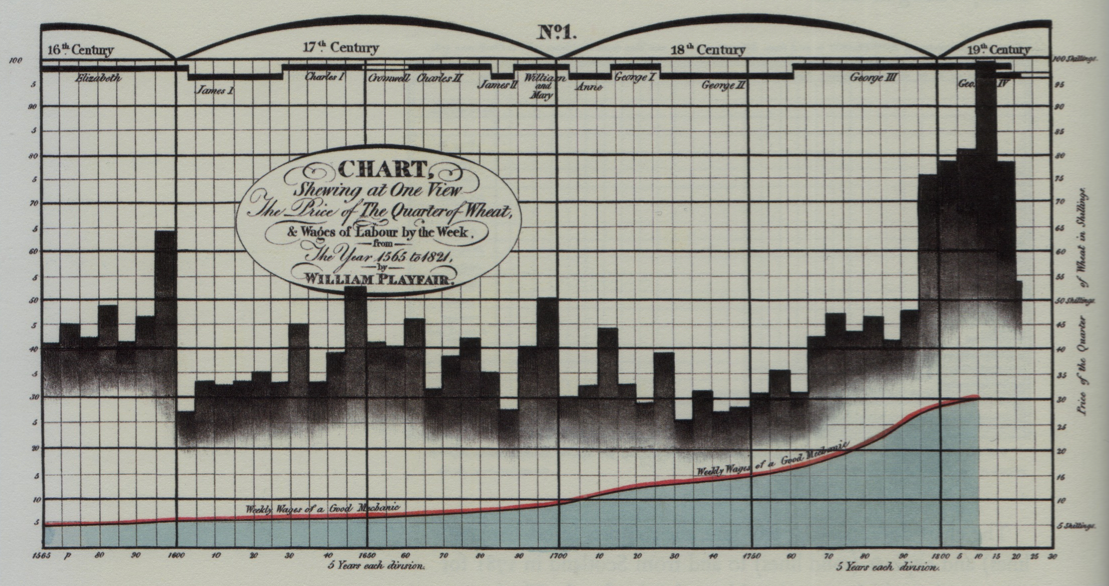

![Graphique Original] (https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png)

Première étape : graphique standard de Pandas
- les deux colonnes sont sous forme linéaire

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a788be550>,
      dtype=object)

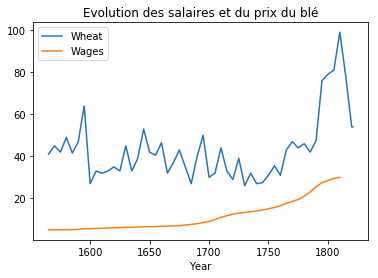

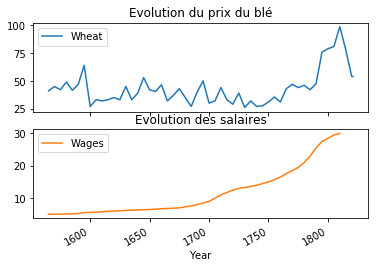

In [7]:
sorted_data.plot(title= "Evolution des salaires et du prix du blé")
sorted_data.plot(subplots=True,title= ["Evolution du prix du blé", "Evolution des salaires"])

On va maintenant essayer de travailler sur le graphique pour arriver à avoir ce que l'on veut !
Après beaucoup de labeur, j'ai réussi à modifier certains élements du graphique grace au code ci-dessous.


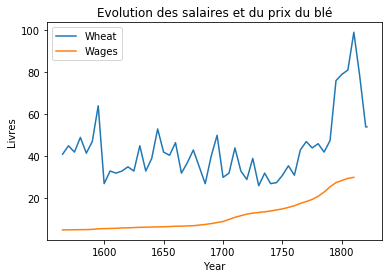

In [8]:
graphique1 = plt.figure()
ax_1_1 = graphique1.add_subplot(111)
plt.ylabel('Livres')
sorted_data.plot(title= "Evolution des salaires et du prix du blé",ax=ax_1_1)


On va maintenant essayer de raffiner !
En n'utilisant pas les fonctions graphique des Panda mais en appelant directement matplotlib

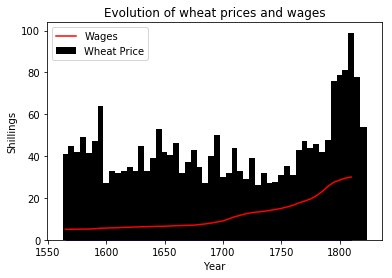

In [9]:
x=list(raw_data["Year"])
y_wages=list(raw_data["Wages"])
y_wheat=list(raw_data["Wheat"])
graphique2 = plt.figure()
ax_2_1 = graphique2.add_subplot(111)
ax_2_1.set(xbound=[1550,1850],ybound=[0,100],ylabel="Shillings",xlabel="Year",Title="Evolution of wheat prices and wages")
ax_2_1.xaxis.set_major_locator(plt.MultipleLocator(50))
ax_2_1.bar(x,y_wheat,width=5, color="black",label="Wheat Price")
ax_2_1.plot(x,y_wages,color="red",label="Wages")
ax_2_1.fill_between(x,y_wages,0,color="blue")
ax_2_1.legend()
       


Le bleu du remplissage entre la ligne rouge des salaires et l'axe est masqué par le noir de l'histogramme !!
J'ai trouvé une méthode dans la doc en ligne de matplotlib pour faire un diagramme en barre avec un gradient de couleur (ce qui pourrait permettre de se rapprocher de la version originale) mais ca me parait bien compliqué à implanter
[doc matplotlib](https://matplotlib.org/gallery/lines_bars_and_markers/gradient_bar.html#sphx-glr-gallery-lines-bars-and-markers-gradient-bar-py)
                 
               
Je tente donc une méthode alternative sans utiliser le style "bar".

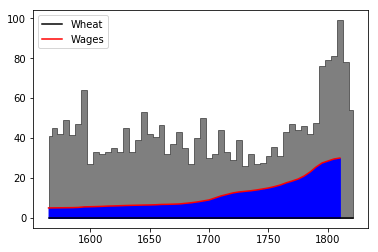

In [12]:
x=list(raw_data["Year"])
y_wages=list(raw_data["Wages"])
y_wheat=list(raw_data["Wheat"])
zero=[0 for i in x]
graphique3 = plt.figure()
ax_3_1 = graphique3.add_subplot(111)
ax3_1.set(xbound=[1550,1850],ybound=[0,100],ylabel="Shillings",xlabel="Year",Title="Evolution of wheat prices and wages")
ax3_1.xaxis.set_major_locator(plt.MultipleLocator(50))
ax_3_1.plot(x,zero,color="black",label="Wheat")
ax_3_1.plot(x,y_wages,color="red",label="Wages")
ax_3_1.fill_between(x,y_wheat,0,color="black",step="mid",alpha=0.5)#alpha permet d'avoir un remplissage semi-transparent
ax_3_1.fill_between(x,y_wages,0,color="blue")
ax_3_1.legend(loc='upper left')


### Deuxième exercice
Il s'agit maintenant d'avoir 2 axes Y différents pour les courbes.
Pour cela, je vais encore m'inspirer de la doc de [matplotlib](https://matplotlib.org/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py) 

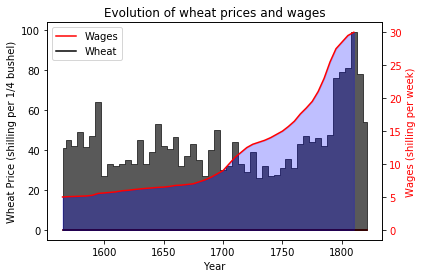

In [13]:
graphique4 = plt.figure()
ax_4_1 = graphique4.add_subplot(111)
ax_4_1.set(xbound=[1550,1850],ybound=[0,100],ylabel="Wheat Price (shilling per 1/4 bushel)",xlabel="Year",Title="Evolution of wheat prices and wages")
ax_4_1.xaxis.set_major_locator(plt.MultipleLocator(50))

ax_4_1.plot(x,zero,color="red",label="Wages")
ax_4_1.plot(x,zero,color="black",label="Wheat")
         
ax_4_1.fill_between(x,y_wheat,0,color="black",step="mid",alpha=0.65)#alpha permet d'avoir un remplissage semi-transparent

ax_4_2=ax_4_1.twinx()
ax_4_2.plot(x,y_wages,color="red",label="Wages")
ax_4_2.fill_between(x,y_wages,0,color="blue",alpha=0.25)
ax_4_2.set_ylabel("Wages (shilling per week)", color="red")
ax_4_2.tick_params(axis='y', labelcolor="red")
ax_4_1.legend(loc='upper left')


Si j'essaie de mettre la meme échelle à droite et à gauche pen utilisant l'attribut ybound, ca ne fonctionne pas !!
En fait il faut utiliser à la place l'attribut ylim.

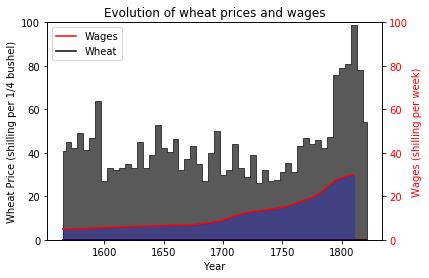

In [18]:
graphique5 = plt.figure()
ax_5_1 = graphique5.add_subplot(111)
ax_5_1.set(xbound=[1550,1850],ylim=[0,100],ylabel="Wheat Price (shilling per 1/4 bushel)",xlabel="Year",Title="Evolution of wheat prices and wages")
ax_5_1.xaxis.set_major_locator(plt.MultipleLocator(50))

ax_5_1.plot(x,zero,color="red",label="Wages")
ax_5_1.plot(x,zero,color="black",label="Wheat")
         
ax_5_1.fill_between(x,y_wheat,0,color="black",step="mid",alpha=0.65)#alpha permet d'avoir un remplissage semi-transparent

ax_5_2=ax_5_1.twinx()
ax_5_2.plot(x,y_wages,color="red",label="Wages")
ax_5_2.fill_between(x,y_wages,0,color="blue",alpha=0.25)
ax_5_2.set_ylabel("Wages (shilling per week)", color="red")
ax_5_2.set_ylim(0,100)
ax_5_2.tick_params(axis='y', labelcolor="red")
ax_5_1.legend(loc='upper left')